In [33]:
import pandas as pd
import os

#### Łączenie plików csv

In [34]:
files = [file for file in os.listdir("./SalesAnalysis/Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./SalesAnalysis/Sales_Data/"+file) 
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index=False)

#### Read updated dataframe

In [35]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Przygotowanie danych

#### Drop rows NAN\

In [36]:
nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how="all")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Znalezienie OR

In [37]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Dodanie kolumny z miesiącem

In [38]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = pd.to_numeric(all_data["Month"])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Największa sprzedaż w okresie

#### Dodanie kolumny ze sprzedażą

In [39]:
all_data["Quantity Ordered"] = pd.to_numeric(all_data["Quantity Ordered"])
all_data["Price Each"] = pd.to_numeric(all_data["Price Each"])
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Zmiana kolejności kolumn

In [40]:
all_data = all_data[["Order ID", "Product", "Quantity Ordered", "Price Each", "Sales", "Order Date", "Purchase Address", "Month"]]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [41]:
results = all_data.groupby(["Month"]).sum()
results = results.drop(["Product", "Order ID", "Product", "Order Date", "Purchase Address"], axis=1)

In [42]:
results.head(12)

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


#### Wizualizacja

In [43]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Month number')

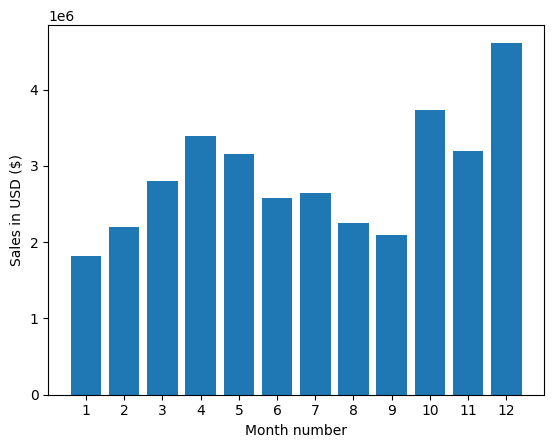

In [44]:
months = range(1, 13)
plt.bar(months, results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month number")

#### Które miasto miało największą sprzedaż

In [52]:
def get_city(address):
    return address.split(",")[1]
def get_state(address):
    return address.split(",")[2].split(" ")[1]
all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


In [68]:
results = all_data.groupby("City").sum()
results = results.drop(["Product", "Order ID", "Product", "Order Date", "Purchase Address"], axis=1)
results.head(10)

,Quantity Ordered,Price Each,Sales,Month
City,,,,
Atlanta (GA),16602,2779908.20,2795498.58,104794
Austin (TX),11153,1809873.61,1819581.75,69829
Boston (MA),22528,3637409.77,3661642.01,141112
Dallas (TX),16730,2752627.82,2767975.40,104620
Los Angeles (CA),33289,5421435.23,5452570.80,208325
New York City (NY),27932,4635370.83,4664317.43,175741
Portland (ME),2750,447189.25,449758.27,17144
Portland (OR),11303,1860558.22,1870732.34,70621
San Francisco (CA),50239,8211461.74,8262203.91,315520


Text(0.5, 0, 'City name')

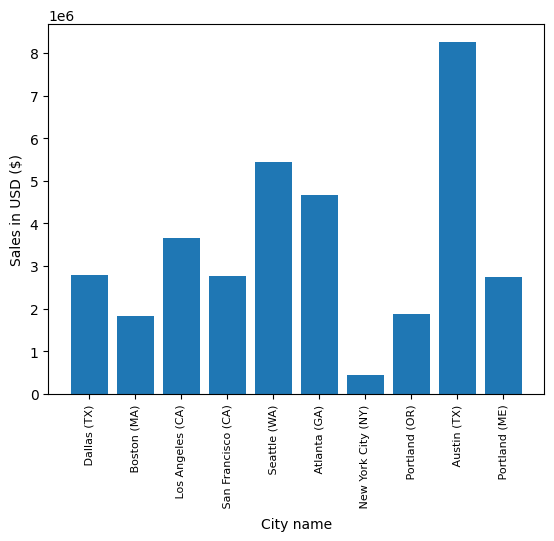

In [60]:
import matplotlib.pyplot as plt

cities = all_data['City'].unique()
plt.bar(cities, results["Sales"])
plt.xticks(cities, rotation ='vertical', size=8)
plt.ylabel("Sales in USD ($)")
plt.xlabel("City name")